# Exploring the dataset
<img src="https://www.travelmate.com.bd/wp-content/uploads/2018/09/Weather-Of-Bangladesh.jpg" alt="Weather" class="center">

In [2]:
import numpy as np
import pandas as pd
import os
#import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('Temp_and_rain.csv')

In [5]:
df


,tem,Month,Year,rain
0,16.9760,1,1901,18.53560
1,19.9026,2,1901,16.25480
2,24.3158,3,1901,70.79810
3,28.1834,4,1901,66.16160
4,27.8892,5,1901,267.21500
...,...,...,...,...
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815


In [6]:
mapping = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",
           8:"August",9:"September",10:"October",11:"November",12:"December"}

df["month"] = df["Month"].map(mapping).astype(str)

In [7]:
mapping = {1 : "Winter",2:"Winter",12: "Winter",3:"Spring",4:"Spring",10:"Late autumn",
           11:"Late autumn",8:"Autumn",9:"Autumn",6:"Rainy",7:"Rainy",4:"Summer",5:"Summer"}

df["Season"] = df["Month"].map(mapping).astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
 4   month   1380 non-null   object 
 5   Season  1380 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 64.8+ KB


In [9]:
df.describe()

,tem,Month,Year,rain
count,1380.000000,1380.000000,1380.00000,1380.000000
mean,25.066213,6.500000,1958.00000,203.275431
std,3.682411,3.453304,33.20842,202.730898
min,16.800600,1.000000,1901.00000,0.000000
25%,22.114125,3.750000,1929.00000,18.498850
50%,27.012950,6.500000,1958.00000,145.086000
75%,28.007850,9.250000,1987.00000,347.639500
max,29.526000,12.000000,2015.00000,1012.020000


In [10]:
print("The dataset started from: ",df['Year'].min(),"\nThe dataset Ends at: ",df['Year'].max())

The dataset started from:  1901 
The dataset Ends at:  2015


### Judging from the data, I think I can answer few questions, like:
- Temparature of Bangladesh
- Rainfall of Bangladesh
- Relation between Temparature and Rainfall

# Let's analyze the temparature

In [11]:
print("Highest Temparature: ",df['tem'].max())
print("Lowest Temparature: ",df['tem'].min())

Highest Temparature:  29.526
Lowest Temparature:  16.8006


**The max temp recorded was on May 1979**

**The min temp recorded was on Janurary 1978**

In [12]:
print(df[df['tem']==df['tem'].max()])
print(df[df['tem']==df['tem'].min()])

        tem  Month  Year     rain month  Season
940  29.526      5  1979  116.378   May  Summer
         tem  Month  Year    rain    month  Season
924  16.8006      1  1978  0.6893  January  Winter


In [13]:
print("Total entries when temparature is above average: ",len(df[df['tem']>=df['tem'].mean()]))
print("Total entries when temparature is less than average: ",len(df)-len(df[df['tem']>=df['tem'].mean()]))

Total entries when temparature is above average:  863
Total entries when temparature is less than average:  517


#### 'January', 'February', 'November', 'December' are the Cold
#### And 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October' are Warm

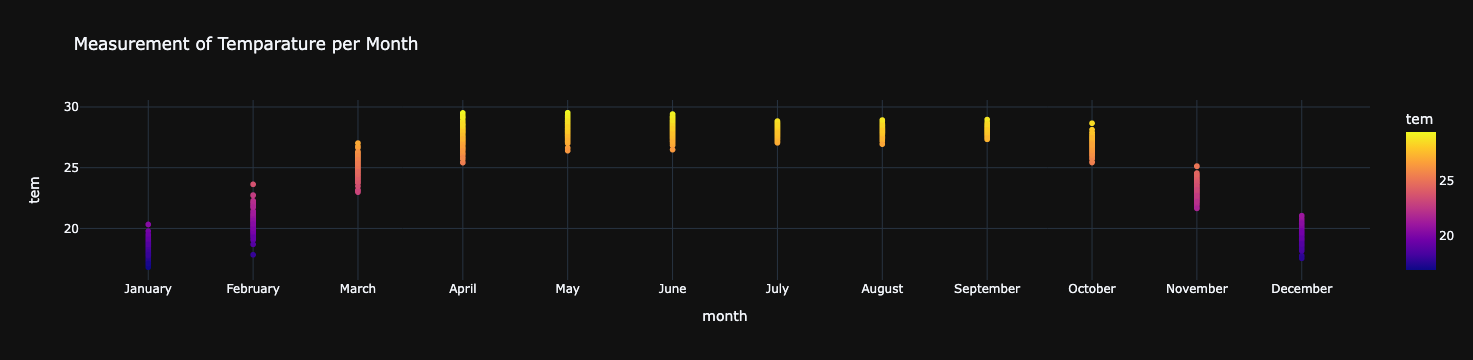

In [14]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "month", y = "tem", color="tem", title = "Measurement of Temparature per Month")
fig.show()

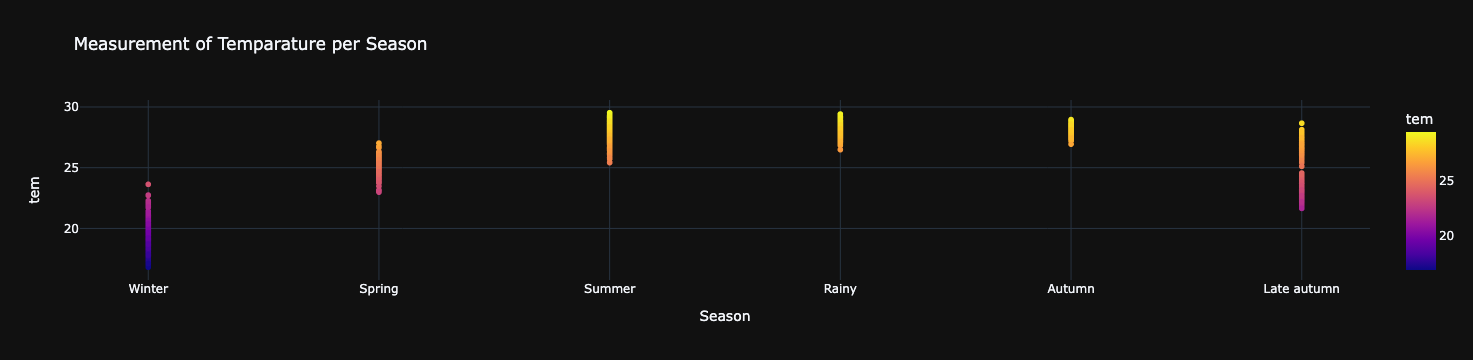

In [15]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "Season", y = "tem", color="tem", title = "Measurement of Temparature per Season")
fig.show()

## We can conclude that Bangladesh is a warm country 

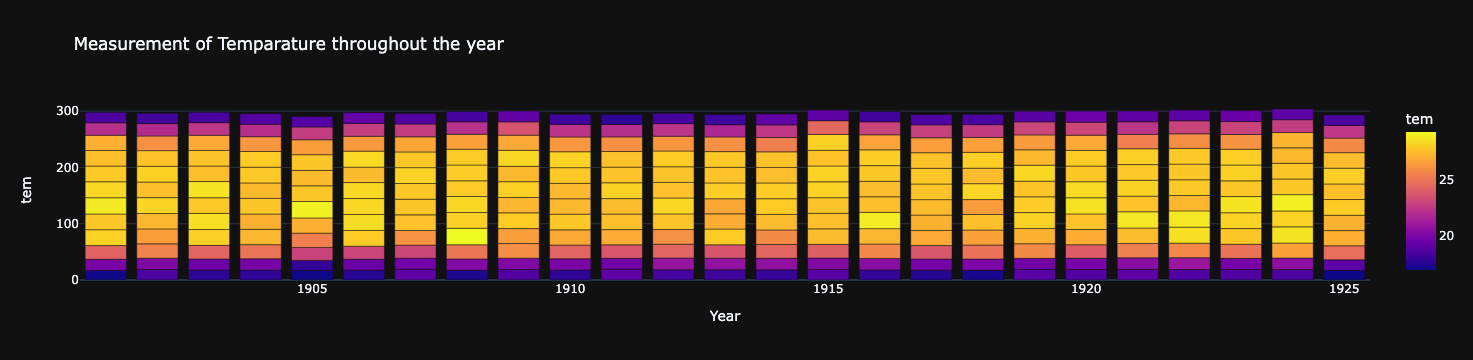

In [16]:
pio.templates.default = "plotly_dark"
fig = px.bar(df[0:300],x='Year',y='tem',color="tem", title = "Measurement of Temparature throughout the year")
fig.show()

#### Max and Min Temperature per months

In [17]:
for i in range(1,13):
    print("Max value for month ",i," is: ",df[df['Month']==i]['tem'].max())
    print("Min value for month ",i," is: ",df[df['Month']==i]['tem'].min())
    print("____________________________________")

Max value for month  1  is:  20.3262
Min value for month  1  is:  16.8006
____________________________________
Max value for month  2  is:  23.6292
Min value for month  2  is:  17.8269
____________________________________
Max value for month  3  is:  27.0261
Min value for month  3  is:  22.9851
____________________________________
Max value for month  4  is:  29.5091
Min value for month  4  is:  25.4188
____________________________________
Max value for month  5  is:  29.526
Min value for month  5  is:  26.4029
____________________________________
Max value for month  6  is:  29.4177
Min value for month  6  is:  26.4861
____________________________________
Max value for month  7  is:  28.8393
Min value for month  7  is:  27.0471
____________________________________
Max value for month  8  is:  28.9236
Min value for month  8  is:  26.9405
____________________________________
Max value for month  9  is:  28.964
Min value for month  9  is:  27.3399
____________________________________
Max

#### Max and Min Temperature per year

In [18]:
for i in range(1901,2016):
    print("Max value for Year ",i," is: ",df[df['Year']==i]['tem'].max())
    print("Min value for Year ",i," is: ",df[df['Year']==i]['tem'].min())
    print("____________________________________")

Max value for Year  1901  is:  28.8925
Min value for Year  1901  is:  16.976
____________________________________
Max value for Year  1902  is:  28.266
Min value for Year  1902  is:  18.2532
____________________________________
Max value for Year  1903  is:  28.6851
Min value for Year  1903  is:  17.7023
____________________________________
Max value for Year  1904  is:  27.9551
Min value for Year  1904  is:  17.7866
____________________________________
Max value for Year  1905  is:  29.0868
Min value for Year  1905  is:  17.0
____________________________________
Max value for Year  1906  is:  28.4449
Min value for Year  1906  is:  17.5423
____________________________________
Max value for Year  1907  is:  28.1978
Min value for Year  1907  is:  18.6971
____________________________________
Max value for Year  1908  is:  29.3307
Min value for Year  1908  is:  17.2889
____________________________________
Max value for Year  1909  is:  28.3398
Min value for Year  1909  is:  18.6933
_______

# Let's analyze the Rainfall data

**Highest rainfall: 1012 was recorded on August 2011**

**Lowest rainfall: 0 was on recorded December 1927**

In [19]:
print(df[df['rain']==df['rain'].max()][['rain','tem','month','Year',]])
print(df[df['rain']==df['rain'].min()][['rain','tem','month','Year',]])

         rain      tem   month  Year
1327  1012.02  28.0651  August  2011
     rain      tem     month  Year
323   0.0  19.4851  December  1927


In [20]:
print("Total entries when rainfall is above average: ",len(df[df['rain']>=df['rain'].mean()]))
print("Total entries when rainfall is less than average: ",len(df)-len(df[df['rain']>=df['rain'].mean()]))

Total entries when rainfall is above average:  599
Total entries when rainfall is less than average:  781


In [21]:
df.head(2)

,tem,Month,Year,rain,month,Season
0,16.9760,1,1901,18.5356,January,Winter
1,19.9026,2,1901,16.2548,February,Winter


### 'May', 'June', 'July','August', 'September' are the months when heavy rainfall takes place

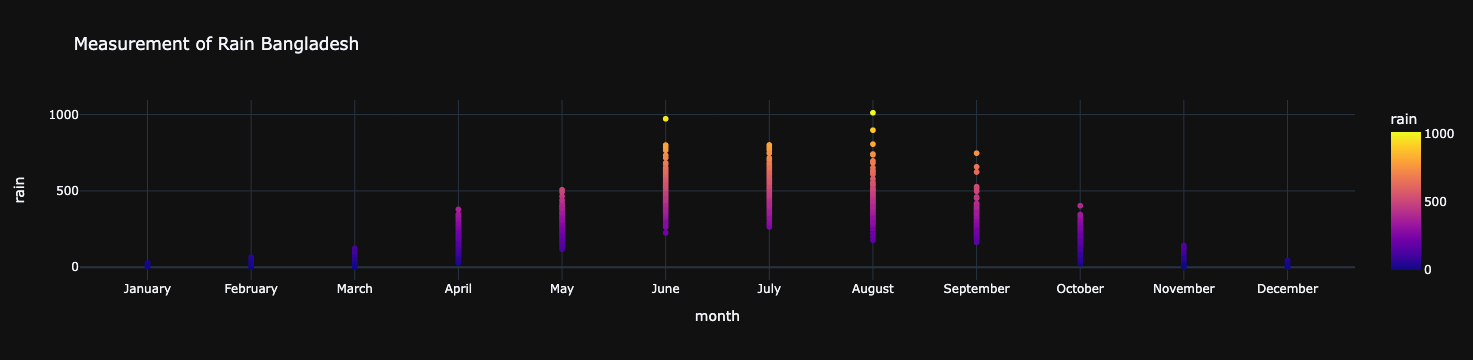

In [22]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "month", y = "rain", color="rain", title = "Measurement of Rain Bangladesh")
fig.show()

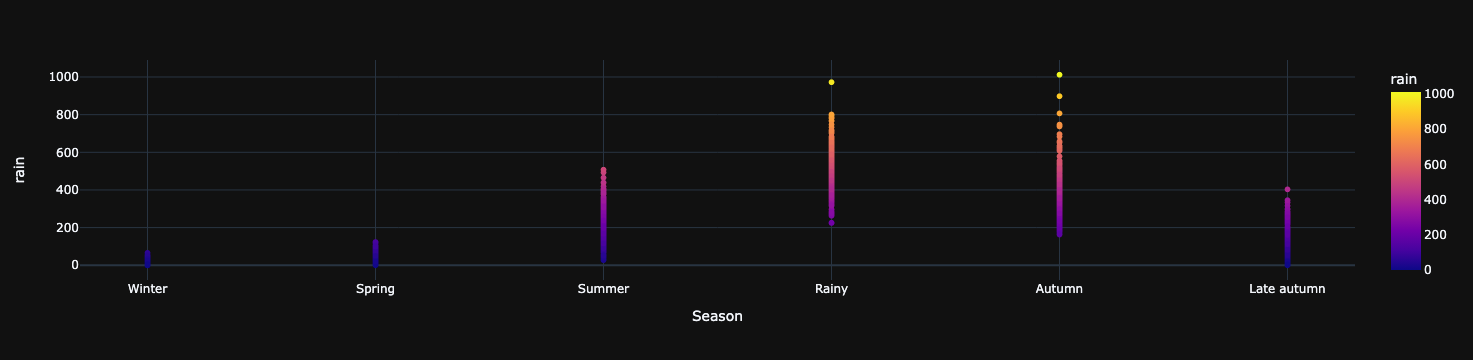

In [23]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "Season", y = "rain", color="rain")
fig.show()

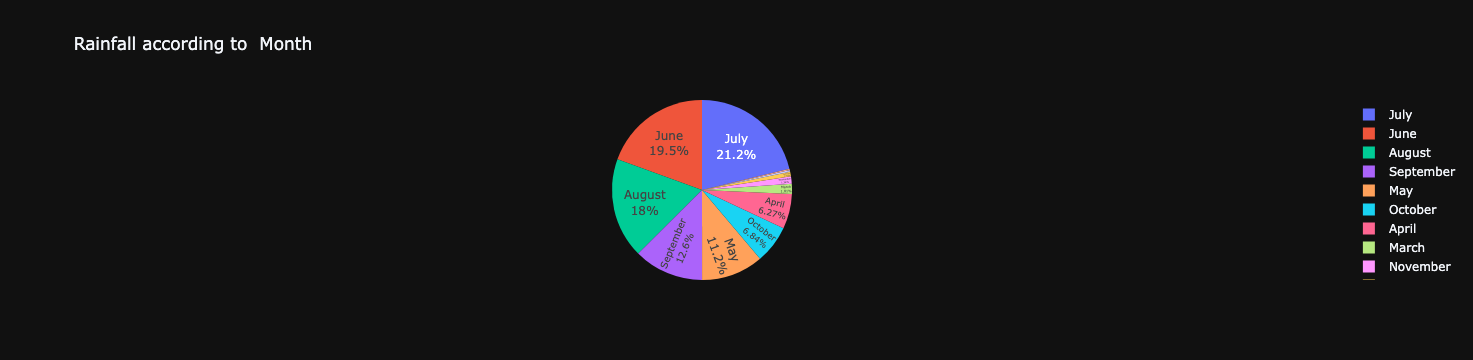

In [24]:
fig = px.pie(df,values="rain",names='month',title="Rainfall according to  Month")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

## Rainfall occurs throughout the year

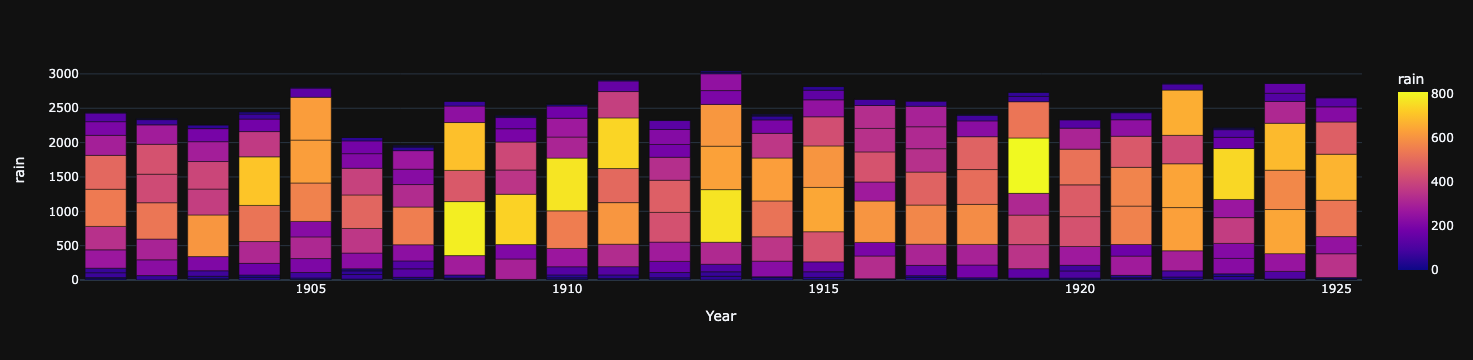

In [25]:
pio.templates.default = "plotly_dark"
fig = px.bar(df[0:300],x='Year',y='rain',color="rain")
fig.show()

#### Max and Min Rainfall per months

In [26]:
for i in range(1,13):
    print("Max value for month ",i," is: ",df[df['Month']==i]['rain'].max())
    print("Min value for month ",i," is: ",df[df['Month']==i]['rain'].min())
    print("____________________________________")

Max value for month  1  is:  29.3725
Min value for month  1  is:  0.00249
____________________________________
Max value for month  2  is:  65.6833
Min value for month  2  is:  0.0057
____________________________________
Max value for month  3  is:  123.366
Min value for month  3  is:  0.05684
____________________________________
Max value for month  4  is:  378.903
Min value for month  4  is:  27.0602
____________________________________
Max value for month  5  is:  507.684
Min value for month  5  is:  116.378
____________________________________
Max value for month  6  is:  972.536
Min value for month  6  is:  224.577
____________________________________
Max value for month  7  is:  800.869
Min value for month  7  is:  264.157
____________________________________
Max value for month  8  is:  1012.02
Min value for month  8  is:  176.275
____________________________________
Max value for month  9  is:  747.339
Min value for month  9  is:  163.07
____________________________________
Max

#### Max and Min Rainfall per Year

In [27]:
for i in range(1901,2016):
    print("Max value for Year ",i," is: ",df[df['Year']==i]['rain'].max())
    print("Min value for Year ",i," is: ",df[df['Year']==i]['rain'].min())
    print("____________________________________")

Max value for Year  1901  is:  540.907
Min value for Year  1901  is:  1.69035
____________________________________
Max value for Year  1902  is:  528.775
Min value for Year  1902  is:  0.14722
____________________________________
Max value for Year  1903  is:  606.088
Min value for Year  1903  is:  0.0104
____________________________________
Max value for Year  1904  is:  707.404
Min value for Year  1904  is:  0.3257
____________________________________
Max value for Year  1905  is:  624.073
Min value for Year  1905  is:  4.91701
____________________________________
Max value for Year  1906  is:  487.922
Min value for Year  1906  is:  0.01352
____________________________________
Max value for Year  1907  is:  549.54
Min value for Year  1907  is:  9.41034
____________________________________
Max value for Year  1908  is:  786.245
Min value for Year  1908  is:  0.06706
____________________________________
Max value for Year  1909  is:  732.781
Min value for Year  1909  is:  0.05684
_____

# Corellation between rain and temparature

### Strong correlation between temperature and rain

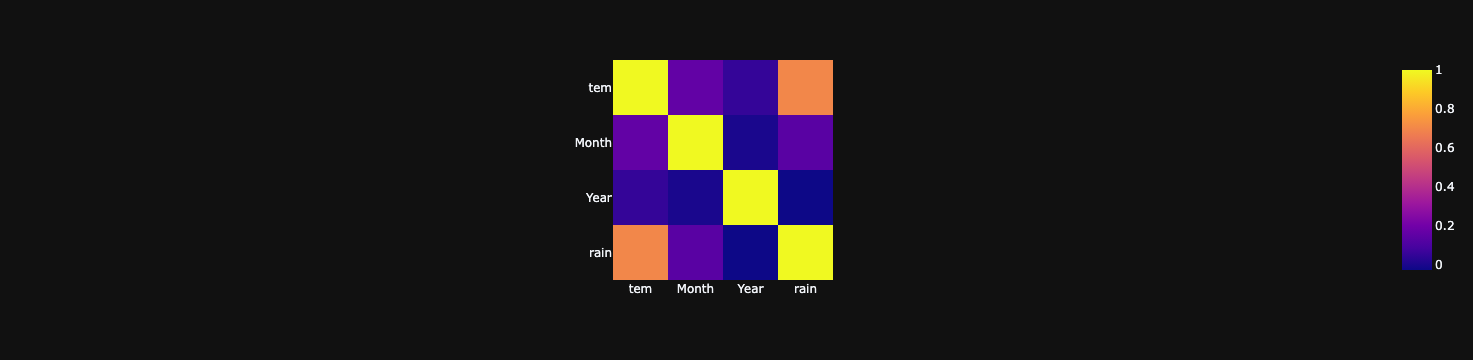

In [28]:
corr = df.corr(method ='pearson')
fig = px.imshow(corr)
fig.show()

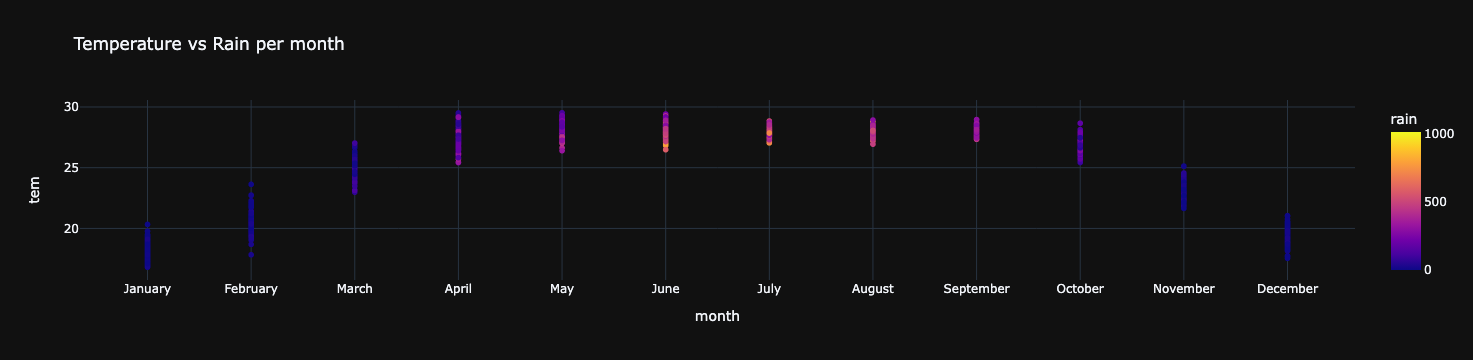

In [29]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "month", y = "tem", color="rain", title="Temperature vs Rain per month")
fig.show()

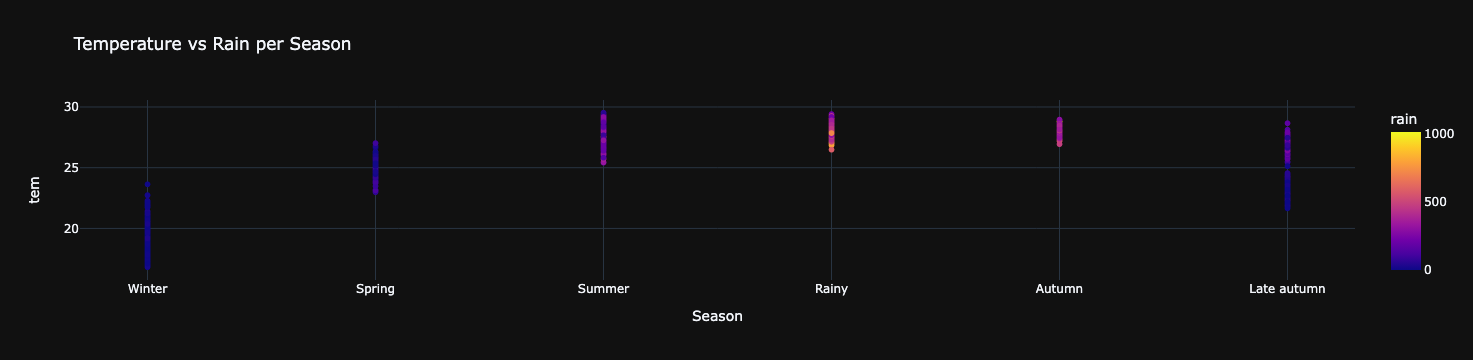

In [30]:
pio.templates.default = "plotly_dark"
fig = px.scatter(df, x = "Season", y = "tem", color="rain", title="Temperature vs Rain per Season")
fig.show()

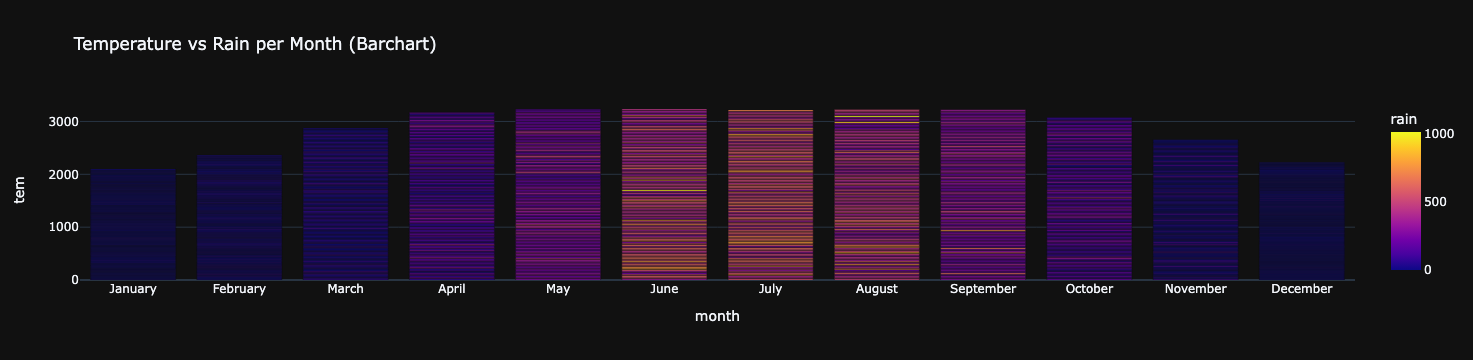

In [31]:
pio.templates.default = "plotly_dark"
fig = px.bar(df, x='month', y='tem', color="rain", title="Temperature vs Rain per Month (Barchart)")
fig.show()

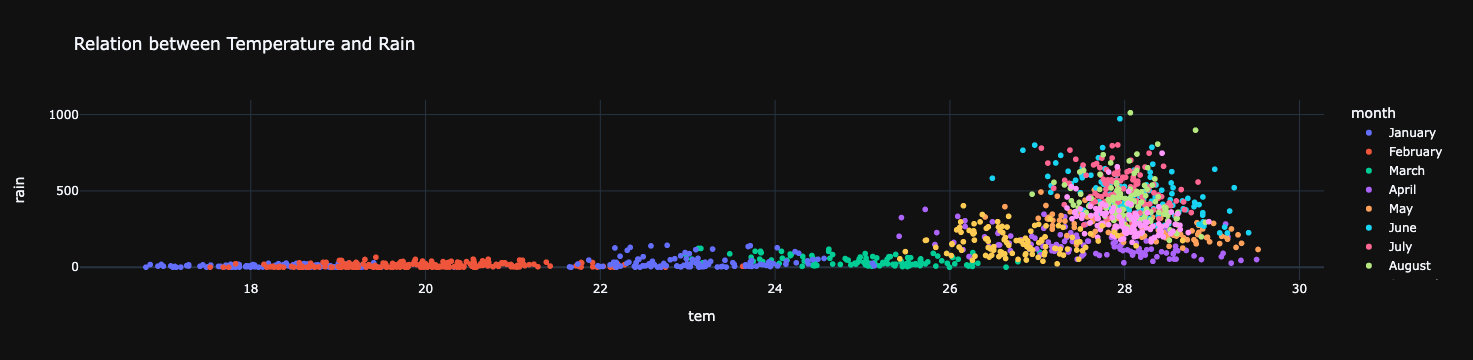

In [32]:
fig = px.scatter(df,x='tem',y ='rain',color="month", title="Relation between Temperature and Rain")
fig.show()

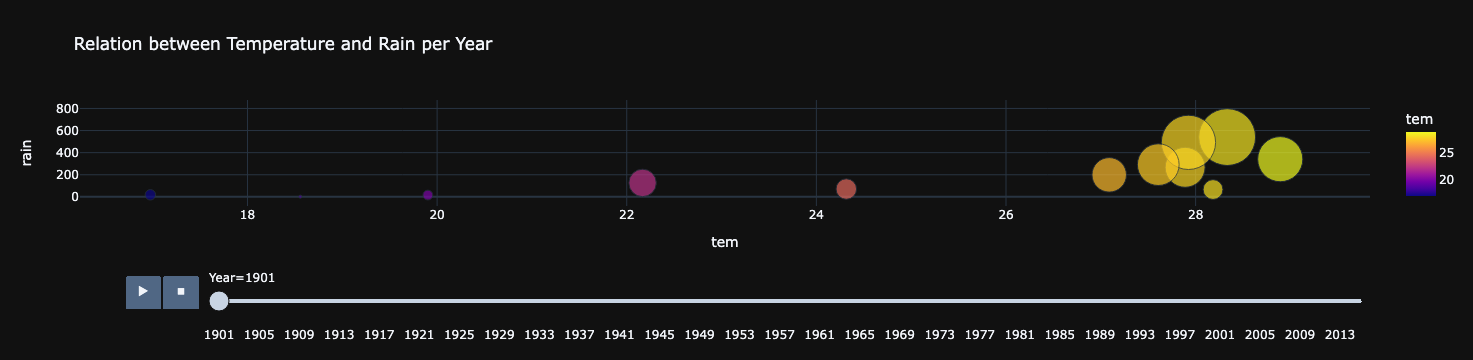

In [36]:
fig = px.scatter(df,x='tem',y ='rain', color= 'tem',animation_frame ='Year',
                 size="rain",size_max = 55, title="Relation between Temperature and Rain per Year")
fig.show()